# Dataset
Datos de compras: https://www.kaggle.com/datasets/carrie1/ecommerce-data/code

In [1]:
import pandas as pd

In [2]:
order = pd.read_csv("Datasets/ecommerce_data.csv", encoding="iso-8859-1")
customer = pd.read_csv("Datasets/ecommerce_customer.csv")

In [3]:
customer.head(2)

,customerID,email,firstname,lastname
0,17850,andrea.fields@raymond.gov,Andrea,Fields
1,13047,anthony.hernandez@jones.org.br,Anthony,Hernandez


In [4]:
order.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.550000,17850.000000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.390000,17850.000000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.750000,17850.000000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.390000,17850.000000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.390000,17850.000000,United Kingdom


# Ejemplo de JOIN
En Pandas utilizamos el método merge para hacer JOINs de la misma forma que en SQL.

In [5]:
order = order.merge(customer, left_on="CustomerID", right_on="customerID", how="inner")

In [6]:
# Visualizamos de nuevo para verificar que el INNER JOIN se ejecutó correctamente
order.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,customerID,email,firstname,lastname
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.550000,17850.000000,United Kingdom,17850,andrea.fields@raymond.gov,Andrea,Fields
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.390000,17850.000000,United Kingdom,17850,andrea.fields@raymond.gov,Andrea,Fields


In [7]:
# Ranking compras
(
    order.groupby(["CustomerID"], as_index=False)["email"]
    .value_counts()
    .sort_values("count", ascending=False)
)

,CustomerID,email,count
4042,17841.000000,ronald.howard@roberts-boyer.org,7983
1895,14911.000000,michelle.edwards@fowler.net.br,5903
1300,14096.000000,jared.christian@harrison.net,5128
330,12748.000000,melissa.jones@parker.com,4642
1674,14606.000000,benjamin.farley@harding.com,2782
...,...,...,...
1318,14119.000000,keith.thomas@brown.gov.br,1
1046,13747.000000,michelle.stewart@page.gov,1
2400,15590.000000,bruce.kennedy@cantrell.com.br,1
2379,15562.000000,michael.fischer@bradshaw.gov,1


In [8]:
# Verificamos el primero del ranking
order.query("customerID == 17841").count()

InvoiceNo      7983
StockCode      7983
Description    7983
Quantity       7983
InvoiceDate    7983
UnitPrice      7983
CustomerID     7983
Country        7983
customerID     7983
email          7983
firstname      7983
lastname       7983
dtype: int64

# Series Temporales

Convertimos la columna `InvoiceDate` a un objecto datatime y añadimos otras columnas útiles para trabajar con series temporales.

In [9]:
order = (
    order.assign(InvoceDate=pd.to_datetime(order.InvoiceDate, format="%m/%d/%Y %H:%M"))
    .assign(month=lambda x: x.InvoceDate.dt.month_name())
    .assign(quarter=lambda x: x.InvoceDate.dt.quarter)
    .assign(year=lambda x: x.InvoceDate.dt.year)
    .assign(amount=lambda x: x.UnitPrice * x.Quantity)[
        ["month", "quarter", "year", "amount"]
    ]
)

In [10]:
order.head(2)

,month,quarter,year,amount
0,December,4,2010,15.300000
1,December,4,2010,20.340000


<Axes: xlabel='month,year'>

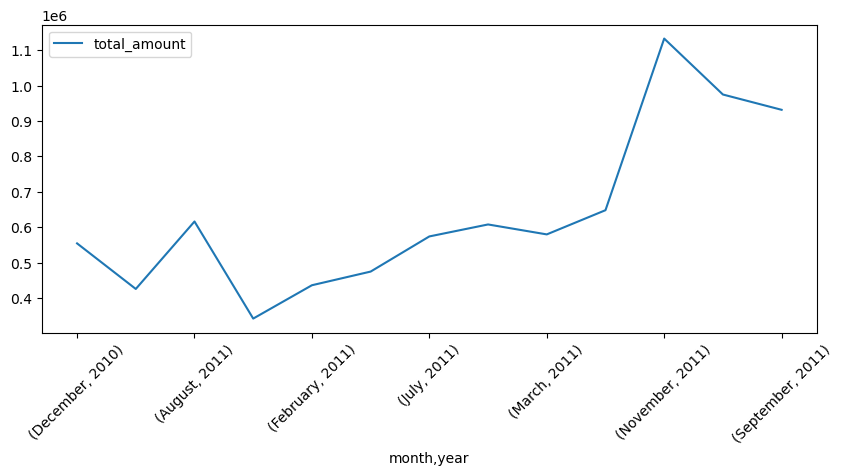

In [11]:
(
    order.groupby(["month", "year"])
    .agg(total_amount=("amount", "sum"))
    .sort_values(["year", "month"])
    .plot.line(figsize=(10, 4), rot=45)
)